In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
feature = pd.DataFrame(iris['data'],columns = iris['feature_names'])
target = pd.DataFrame(iris['target'],columns = ['class'])

df = pd.concat([feature,target],axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
X=df.iloc[:,:2].values
y=df.iloc[:,4].values   #class

In [14]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [15]:
y[:5]

array([0, 0, 0, 0, 0])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [17]:
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

gnb = GaussianNB()
gnb.fit(X_train_std,y_train)

y_train_pred = gnb.predict(X_train_std)
y_test_pred = gnb.predict(X_test_std)

accuracy_train = 100.0*(y_train==y_train_pred).sum()/X_train_std.shape[0]
accuracy_test = 100.0*(y_test==y_test_pred).sum()/X_test_std.shape[0]

print('Accuracy tain: %.3f,test:%.3f'%(accuracy_train,accuracy_test))

Accuracy tain: 81.905,test:71.111


In [18]:
#劃分界的那條線 function plot_dscision_regions
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #setup maker generator and color map
    markers=('s','x','o','^')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap =cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],
                    y=X[y ==cl,1],
                   alpha = 0.8,
                   c=colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test,y_test = X[test_idx,:],y[test_idx]
        
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor = 'black',
                    alpha = 1.0,
                    linewidth=1,
                    marker ='o',
                    s=100,
                    label = 'test set')
    

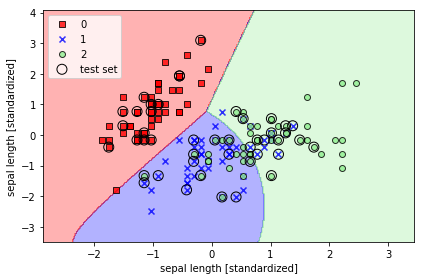

In [19]:
import matplotlib.pyplot as plt
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined  = np.hstack((y_train,y_test))

plot_decision_regions(X_combined_std,y_combined,classifier=gnb,test_idx=range(105,150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()